In [1]:
library(tidyverse)
library(lubridate)

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
occ <- read_csv("../Data/insects/edi.481.5/Genus_Occurrences.csv")

occ <- occ %>%
    mutate(Date = str_remove(Date, " 0:00")) %>%
    mutate(Date = mdy(Date))

Rows: 1048575 Columns: 6
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Genus, Date, Horizontal_datum
dbl (3): Unique_ID, Latitude, Longitude

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Date = mdy(Date)`.
Caused by warning:
!  1105 failed to parse.”


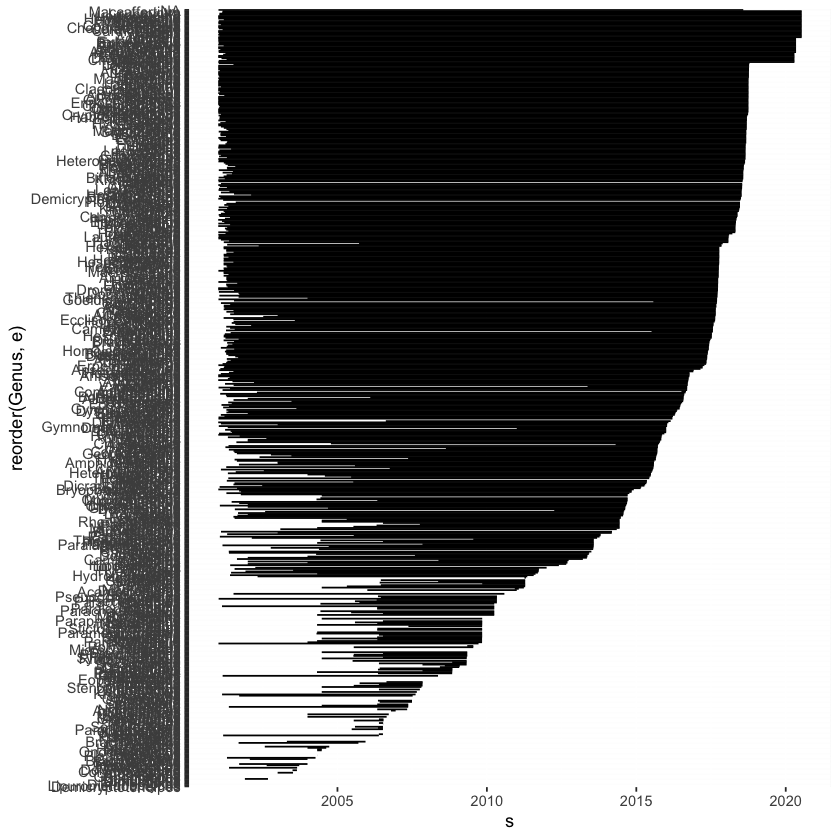

In [3]:
occ %>%
    filter(!is.na(Date)) %>%
    group_by(Genus) %>%
    summarise(s = min(Date), e = max(Date)) %>%
    ggplot(aes(y=reorder(Genus, e)))+
        geom_segment(aes(x = s, xend = e, yend = Genus))

`geom_smooth()` using formula = 'y ~ x'


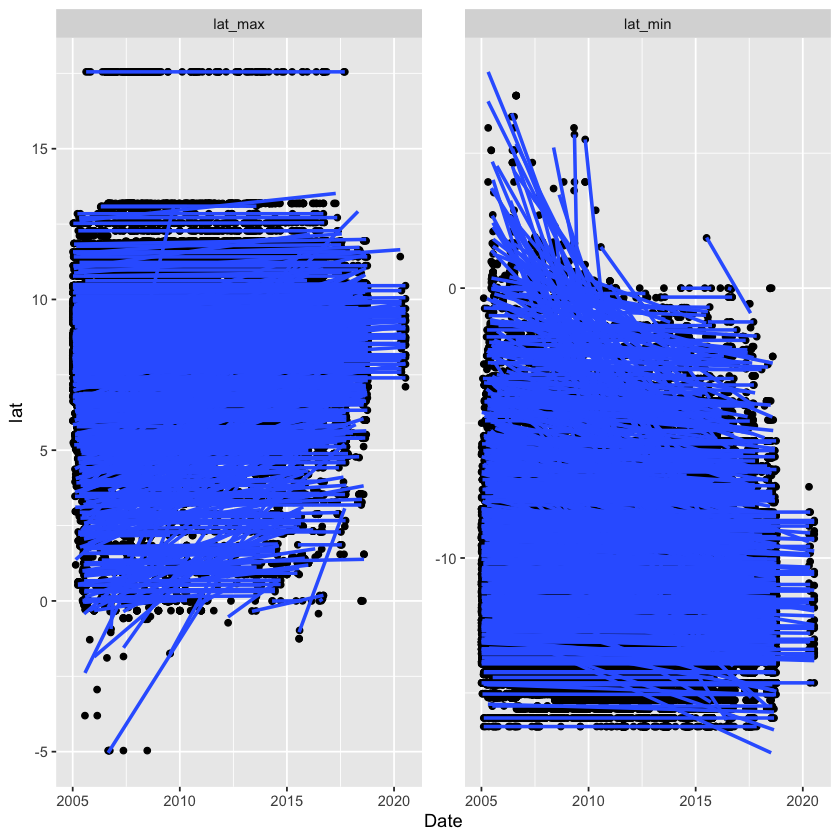

In [5]:
occ %>%
    filter(!is.na(Date)) %>%
    arrange(Date) %>%
    group_by(Genus) %>% 
    mutate(lat_max = cummax(Latitude) - mean(Latitude), lat_min = cummin(Latitude) - mean(Latitude)) %>%
    filter(Date > dmy("01/01/2005")) %>%
    pivot_longer(c(lat_min,lat_max), names_to = "metric", values_to = "lat") %>%
    ggplot(aes(x = Date, y = lat, group = Genus))+
        facet_wrap(~metric, scales = "free")+
        geom_point()+
        geom_smooth(method = "lm", se = FALSE, alpha = 0.1)


No summary function supplied, defaulting to `mean_se()`


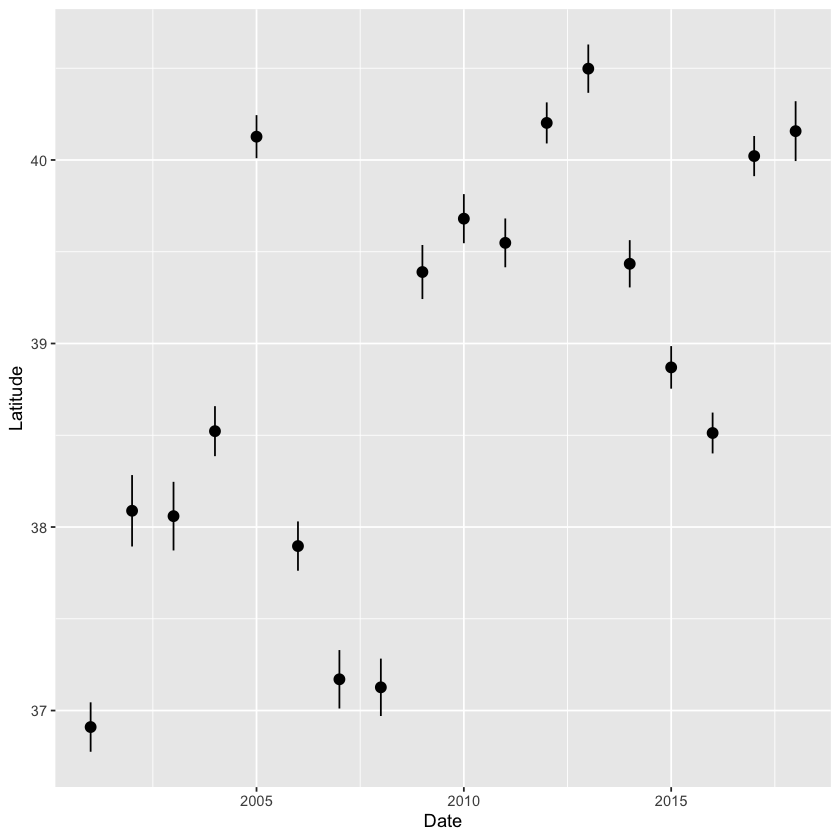

In [24]:
occ %>%
    filter(!is.na(Date)) %>%
    arrange(Date) %>%
    group_by(Genus) %>% 
    # mutate(lat_max = cummax(Latitude) - mean(Latitude), lat_min = cummin(Latitude) - mean(Latitude)) %>%
    # filter(Date > dmy("01/01/2003"), Date < dmy("01/01/2006")) %>%
    filter(Genus == "Ablabesmyia") %>%
    mutate(Date = floor_date(Date, "year")) %>%
    ggplot(aes(x=Date,y=Latitude))+
        stat_summary()


In [20]:
occ

Unique_ID,Genus,Date,Latitude,Longitude,Horizontal_datum
<dbl>,<chr>,<date>,<dbl>,<dbl>,<chr>
1,Ablabesmyia,2005-08-03,44.93489,-88.90171,NAD83
2,Ablabesmyia,2004-06-23,44.87051,-88.78485,NAD83
3,Ablabesmyia,2006-04-24,44.93489,-88.90171,NAD83
4,Ablabesmyia,2008-05-16,44.85958,-88.79252,NAD83
5,Ablabesmyia,2009-04-28,44.93489,-88.90171,NAD83
6,Ablabesmyia,2006-07-11,44.93489,-88.90171,NAD83
7,Ablabesmyia,2010-05-03,44.90469,-88.84403,NAD83
8,Ablabesmyia,2010-05-03,44.93489,-88.90171,NAD83
9,Ablabesmyia,2009-04-29,44.85958,-88.79252,NAD83
